<a href="https://colab.research.google.com/github/MorozovDesu/neural_network_technologies/blob/main/%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D1%81%D0%B5%D1%82%D0%B5%D0%B2%D1%8B%D0%B5_%D1%82%D0%B5%D1%85%D0%BD%D0%BE%D0%BB%D0%BE%D0%B3%D0%B8%D0%B8_1_%D0%9B%D0%B0%D0%B1%D0%B0_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [ ]:
# Функция для генерации случайных чисел с гипергеометрическим распределением
def generate_hypergeometric_matrix(M, P, population_size, success_population_size, sample_size):
    random_numbers = np.random.hypergeometric(success_population_size, population_size - success_population_size, sample_size, size=(M, P))
    return random_numbers

# Параметры гипергеометрического распределения
population_size = 1000         # Общий размер популяции
success_population_size = 300  # Размер подмножества с успехами в популяции
sample_size = 50               # Размер выборки

M = 100  # Количество строк (наблюдений)
P = 3    # Количество столбцов (признаков)
N = 5    # Количество классов

# Генерируем матрицу
random_matrix = generate_hypergeometric_matrix(M, P, population_size, success_population_size, sample_size)

# Создаем массив с метками классов
class_labels = np.random.randint(0, N, size=M)

# Функция для добавления добавки к числам в зависимости от класса и нормализации
def add_noise_and_normalize(data_matrix, class_labels):
    modified_matrix = data_matrix.astype(float)              # Преобразуем матрицу к вещественному типу
    for i in range(M):
        noise = np.random.uniform(-0.5, 0.5, P)              # Генерируем случайный шум для каждой строки
        modified_matrix[i] += noise * (class_labels[i] + 1)  # Модифицируем данные в соответствии с классом
        # Нормализуем данные к диапазону от 0 до 1
        modified_matrix[i] = (modified_matrix[i] - modified_matrix[i].min()) / (modified_matrix[i].max() - modified_matrix[i].min())
        # Убеждаемся, что все значения признаков находятся в диапазоне [0, 1]
        modified_matrix[i] = np.clip(modified_matrix[i], 0, 1)
    # Добавляем классификационный признак
    classification_feature = np.array(class_labels).reshape((M, 1))
    modified_matrix = np.concatenate((modified_matrix, classification_feature), axis=1)

    return modified_matrix

# Применяем функцию для добавления добавки и нормализации
modified_matrix = add_noise_and_normalize(random_matrix, class_labels)

# Выводим матрицу
print(modified_matrix)

[[0.         1.         0.85238328 1.        ]
 [1.         0.72522426 0.         2.        ]
 [0.         0.4945577  1.         1.        ]
 [0.         1.         0.05784098 0.        ]
 [0.27789843 0.         1.         1.        ]
 [0.         1.         0.54440117 1.        ]
 [1.         0.         0.07875698 4.        ]
 [1.         0.88674496 0.         2.        ]
 [0.         1.         0.28113731 1.        ]
 [1.         0.65670668 0.         0.        ]
 [0.19038859 1.         0.         2.        ]
 [1.         0.         0.98717809 4.        ]
 [0.01190307 0.         1.         1.        ]
 [0.         0.27773913 1.         2.        ]
 [1.         0.         0.70448694 0.        ]
 [0.         0.68687883 1.         4.        ]
 [1.         0.14822144 0.         1.        ]
 [0.87898983 1.         0.         3.        ]
 [1.         0.67337242 0.         0.        ]
 [1.         0.         0.68233902 3.        ]
 [0.         0.37920014 1.         1.        ]
 [1.         

In [ ]:
from sklearn.model_selection import train_test_split

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(modified_matrix[:, :-1], modified_matrix[:, -1], test_size=0.2, random_state=42)

# X_train содержит признаки для обучения модели
# X_test содержит признаки для тестирования модели
# y_train содержит метки классов для обучения модели
# y_test содержит метки классов для тестирования модели

In [ ]:
# Создаем перцептрон
perceptron = Perceptron()

# Обучаем перцептрон
perceptron.fit(X_train, y_train)

# Предсказываем метки классов для обучающей выборки
train_predictions = perceptron.predict(X_train)

# Предсказываем метки классов для тестовой выборки
test_predictions = perceptron.predict(X_test)

# Вычисляем процент правильно классифицированных объектов 1 класса
class_1_accuracy = accuracy_score(y_train, train_predictions)

# Вычисляем процент правильно классифицированных объектов 2 класса
class_2_accuracy = accuracy_score(y_test, test_predictions)

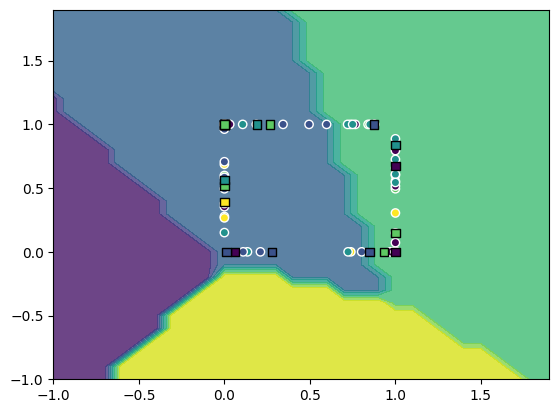

In [ ]:
# Создаем сетку точек для графика разделяющей поверхности
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Добавляем третий признак (константный) к данным
X_with_bias = np.c_[X_train, np.ones(X_train.shape[0])]

# Предсказываем метки классов для всех точек на сетке
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel(), np.ones(xx.ravel().shape[0])])
Z = Z.reshape(xx.shape)

# Рисуем график разделяющей поверхности
plt.contourf(xx, yy, Z, alpha=0.8)

# Рисуем точки обучающей выборки
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', edgecolor='white')

# Рисуем точки тестовой выборки
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='s', edgecolor='black')